# MODELING ANALISIS SENTIMEN REVIEW APK PLAY STORE INDODAX (EXCHANGE CRYPTO)

# import Library

In [ ]:
# Loading dataSet
import pandas as pd
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik

#Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

#preprosessing
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

#Pustaka NLP (preprocessing data)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading DataSet

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd
app_reviews_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Analisi Sentimen /Indodax Analisis/ulasan_aplikasi.csv")

# Menghitung jumlah baris dan kolom dalam DataFrame
app_reviews_df.shape

(68318, 11)

In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head(10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c81e3f12-5ba4-4a62-9fbb-404cfc7696d7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kesulitan ada disaat pembuatan garis trend dan...,5,4,5.5.0,2025-05-07 05:15:57,Dear member INDODAX. Terima kasih atas review ...,2025-05-07 20:59:32,5.5.0
1,a86fe68b-785a-4b6f-af4f-17be12f5de60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Indodax 3.0 mudah digunakan dan aksesibel, Den...",5,20,5.5.0,2025-05-04 01:35:01,Dear member INDODAX. Terima kasih atas review ...,2025-05-03 11:16:57,5.5.0
2,04d70e2f-765e-46d9-b05f-41da2e7d13fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menurut saya aplikasi indodax ini sangat memba...,5,9,5.5.0,2025-05-05 07:13:11,"Dear member INDODAX, terima kasih atas review ...",2025-05-05 21:19:58,5.5.0
3,d3f2847f-5945-48f2-b8ec-151929689e88,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"top lah buat aplikasi indodax, buat investasi ...",5,5,5.5.0,2025-05-06 10:48:48,"Dear member, terima kasih telah mengikuti even...",2025-05-06 13:19:40,5.5.0
4,e8a40a50-62da-472f-ad0e-5089d9df74b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menurut saya ini aplikasi indodax paling mudah...,5,3,5.5.0,2025-05-04 16:44:17,"Dear member, terima kasih telah mengikuti even...",2025-05-05 02:08:48,5.5.0
5,5b2532ac-da3e-468c-8487-f79ed093c8fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pertama kali coba Indodax, langsung jatuh hati...",5,20,5.4.9,2025-04-30 10:51:10,"Dear member, terima kasih telah mengikuti even...",2025-04-30 16:40:05,5.4.9
6,f56efb7c-582e-4e9a-b33e-a1cfc364e270,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"""INDODAX 3.0, investasi jadi lebih mudah dan m...",5,1,5.5.0,2025-05-05 04:25:26,"Dear member, terima kasih telah mengikuti even...",2025-05-05 06:20:39,5.5.0
7,c603d8d4-c403-476d-9cc0-72d1d3eac838,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menurut saya ini aplikasi paling mudah buat in...,5,19,5.5.0,2025-05-02 09:19:54,"Dear member, terima kasih telah mengikuti even...",2025-05-02 09:50:55,5.5.0
8,0f5f1525-5c67-4487-b796-4c7eca6666ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi nya enak buat pemula juga trs banyak ...,5,6,5.5.0,2025-05-03 08:09:11,Dear member INDODAX. Terima kasih atas review ...,2025-05-05 09:22:39,5.5.0
9,f00e1a24-02fa-4974-aab1-c6770b653658,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sebagai pengguna baru, saya langsung terkesan ...",5,0,5.5.0,2025-05-04 01:20:12,"Dear member INDODAX, terima kasih telah mengik...",2025-05-06 19:41:38,5.5.0


### Assesing Data

In [ ]:
# Menampikan informasi data aplikasi reviews
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68318 entries, 0 to 68317
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              68318 non-null  object
 1   userName              68318 non-null  object
 2   userImage             68318 non-null  object
 3   content               68317 non-null  object
 4   score                 68318 non-null  int64 
 5   thumbsUpCount         68318 non-null  int64 
 6   reviewCreatedVersion  54217 non-null  object
 7   at                    68318 non-null  object
 8   replyContent          68318 non-null  object
 9   repliedAt             68318 non-null  object
 10  appVersion            54217 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.7+ MB


In [ ]:
#missing value
app_reviews_df.isna().sum()

,0
reviewId,0
userName,0
userImage,0
content,1
score,0
thumbsUpCount,0
reviewCreatedVersion,14101
at,0
replyContent,0
repliedAt,0


In [ ]:
print("Jumlah Duplikasi :", app_reviews_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
app_reviews_df.describe()

,score,thumbsUpCount
count,68318.000000,68318.000000
mean,4.066761,0.533944
std,1.581611,4.604187
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,319.000000


### Cleaning Data

In [ ]:
app_reviews_df[app_reviews_df.appVersion.isna()]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
2226,d63cc0fa-960d-4102-88d7-cb88097d2dd2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,INDODAX cocok banget buat pemula seperti saya!...,5,0,NaN,2025-04-12 08:11:45,Dear member INDODAX. Terima kasih atas review ...,2025-04-12 08:44:34,NaN
2227,90f18b60-b08c-4ecf-a1b5-7ef6e70c92fb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sudah pakai Indodax cukup lama, dan sejauh ini...",5,0,NaN,2025-05-06 14:20:40,"Dear member, terima kasih telah mengikuti even...",2025-05-06 21:38:59,NaN
2229,89666d54-fc8b-43d3-b262-8aeb5c010c56,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sudah coba Indodax beberapa hari dan seja...,5,0,NaN,2025-05-03 08:29:43,Dear member INDODAX. Terima kasih atas review ...,2025-05-03 19:17:19,NaN
2231,3bc502c6-68d9-41b2-be89-74c3cb59a71b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat sangat puas sekali mengunakan aplikasi ...,5,0,NaN,2025-04-29 00:44:23,"Dear member, terima kasih telah mengikuti even...",2025-04-29 05:29:38,NaN
2232,c060bf7d-fbf4-4687-bd69-97ea3358c2d7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Selama saya menggunakan INDODAX, saya merasa n...",5,0,NaN,2025-05-02 16:04:02,"Dear member INDODAX, terima kasih telah mengik...",2025-05-03 00:38:59,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68313,986b328a-c033-4f31-ae69-a4e6d0983bc4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👎,1,0,NaN,2018-12-05 18:05:15,Dear member INDODAX. Mohon maaf atas ketidakny...,2024-08-26 11:10:03,NaN
68314,df176c8c-f4a3-4ec3-b742-ad9ee036be1f,Layar Tancap,https://play-lh.googleusercontent.com/a/ACg8oc...,👎👎👎,1,0,NaN,2021-10-28 02:04:02,Dear member Indodax. Mohon maaf atas ketidakny...,2021-10-28 07:28:10,NaN
68315,b9090f76-34dc-4386-84bd-10799d48247b,Lia Oktavia & Gusmara,https://play-lh.googleusercontent.com/a-/ALV-U...,😠,1,0,NaN,2021-02-06 02:45:13,Dear member Indodax. Mohon maaf atas ketidakny...,2021-03-26 10:26:45,NaN
68316,42f9be68-da79-43f5-9daf-df2f9f41cfe8,L2rid35690 Lineage3,https://play-lh.googleusercontent.com/a/ACg8oc...,🤣🤣🤣🤣🤣🤣,1,0,NaN,2021-02-02 06:53:14,Dear member Indodax. Mohon maaf atas ketidakny...,2021-02-21 01:28:31,NaN


In [ ]:
app_reviews_df[app_reviews_df.content.isna()]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
64577,3230445a-7880-4c14-af3d-deee971052b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,NaN,5,0,2.0.2,2015-03-16 08:07:47,Dear member INDODAX. Terima kasih atas review ...,2024-09-01 01:27:50,2.0.2


In [ ]:
app_reviews_df.drop(['reviewId','userName','userImage','score', 'thumbsUpCount','reviewCreatedVersion','at', 'replyContent','repliedAt','appVersion' ], axis=1, inplace=True)
print(app_reviews_df)

                                                 content
0      kesulitan ada disaat pembuatan garis trend dan...
1      Indodax 3.0 mudah digunakan dan aksesibel, Den...
2      menurut saya aplikasi indodax ini sangat memba...
3      top lah buat aplikasi indodax, buat investasi ...
4      menurut saya ini aplikasi indodax paling mudah...
...                                                  ...
68313                                                  👎
68314                                                👎👎👎
68315                                                  😠
68316                                             🤣🤣🤣🤣🤣🤣
68317                                                  😓

[68318 rows x 1 columns]


In [ ]:
app_reviews_df.isna().sum()

,0
content,1


In [ ]:
app_reviews_df.dropna(inplace=True)

In [ ]:
app_reviews_df.isna().sum()

,0
content,0


In [ ]:
app_reviews_df.shape

(68317, 1)

## Teks Preprocessing

In [ ]:
# membersihkan Teks ulasan
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text



In [ ]:
# Menjadikan teks lower case
def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text



In [ ]:
# Steming data ( menghapus kata imbuhan )
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
app_reviews_df

,content
0,kesulitan ada disaat pembuatan garis trend dan...
1,"Indodax 3.0 mudah digunakan dan aksesibel, Den..."
2,menurut saya aplikasi indodax ini sangat memba...
3,"top lah buat aplikasi indodax, buat investasi ..."
4,menurut saya ini aplikasi indodax paling mudah...
...,...
68313,👎
68314,👎👎👎
68315,😠
68316,🤣🤣🤣🤣🤣🤣


In [ ]:
import nltk
nltk.download('punkt_tab')

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
app_reviews_df['text_clean'] = app_reviews_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
app_reviews_df['text_casefoldingText'] = app_reviews_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
app_reviews_df['text_slangwords'] = app_reviews_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
app_reviews_df['text_tokenizingText'] = app_reviews_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
app_reviews_df['text_stopword'] = app_reviews_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
app_reviews_df['text_akhir'] = app_reviews_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
app_reviews_df

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,kesulitan ada disaat pembuatan garis trend dan...,kesulitan ada disaat pembuatan garis trend dan...,kesulitan ada disaat pembuatan garis trend dan...,kesulitan ada disaat pembuatan garis trend dan...,"[kesulitan, ada, disaat, pembuatan, garis, tre...","[kesulitan, disaat, pembuatan, garis, trend, m...",kesulitan disaat pembuatan garis trend mengges...
1,"Indodax 3.0 mudah digunakan dan aksesibel, Den...",Indodax mudah digunakan dan aksesibel Dengan ...,indodax mudah digunakan dan aksesibel dengan ...,indodax mudah digunakan dan aksesibel dengan a...,"[indodax, mudah, digunakan, dan, aksesibel, de...","[indodax, mudah, aksesibel, antarmuka, intuiti...",indodax mudah aksesibel antarmuka intuitif pro...
2,menurut saya aplikasi indodax ini sangat memba...,menurut saya aplikasi indodax ini sangat memba...,menurut saya aplikasi indodax ini sangat memba...,menurut saya aplikasi indodax ini sangat memba...,"[menurut, saya, aplikasi, indodax, ini, sangat...","[aplikasi, indodax, membantu, kaum, muda, kala...",aplikasi indodax membantu kaum muda kalangan b...
3,"top lah buat aplikasi indodax, buat investasi ...",top lah buat aplikasi indodax buat investasi n...,top lah buat aplikasi indodax buat investasi n...,top lah buat aplikasi indodax buat investasi n...,"[top, lah, buat, aplikasi, indodax, buat, inve...","[top, aplikasi, indodax, investasi, mudah, ban...",top aplikasi indodax investasi mudah banget fi...
4,menurut saya ini aplikasi indodax paling mudah...,menurut saya ini aplikasi indodax paling mudah...,menurut saya ini aplikasi indodax paling mudah...,menurut saya ini aplikasi indodax paling mudah...,"[menurut, saya, ini, aplikasi, indodax, paling...","[aplikasi, indodax, mudah, investasi, beli, ko...",aplikasi indodax mudah investasi beli koin apl...
...,...,...,...,...,...,...,...
68313,👎,,,,[],[],
68314,👎👎👎,,,,[],[],
68315,😠,,,,[],[],
68316,🤣🤣🤣🤣🤣🤣,,,,[],[],


## Pelabelan

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")


# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')


if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = app_reviews_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
app_reviews_df['polarity_score'] = results[0]
app_reviews_df['polarity'] = results[1]
print(app_reviews_df['polarity'].value_counts())

polarity
positive    47436
negative    20881
Name: count, dtype: int64


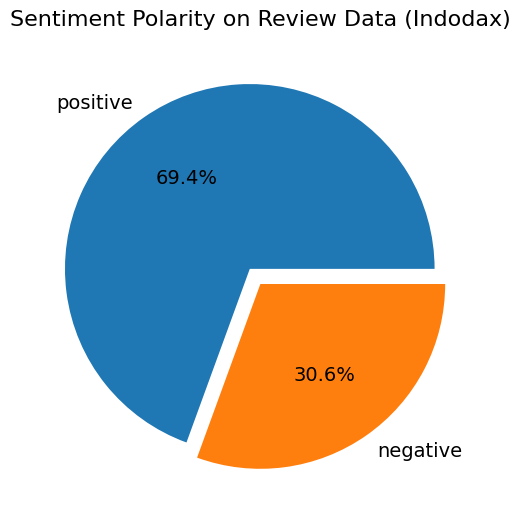

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in app_reviews_df['polarity'].value_counts()]

labels = list(app_reviews_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data (Indodax)', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = app_reviews_df[app_reviews_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = app_reviews_df[app_reviews_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

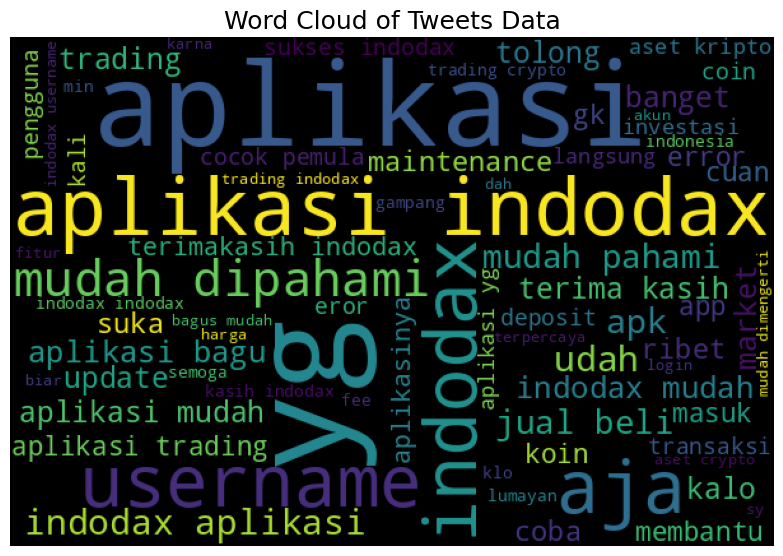

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in app_reviews_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='black', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

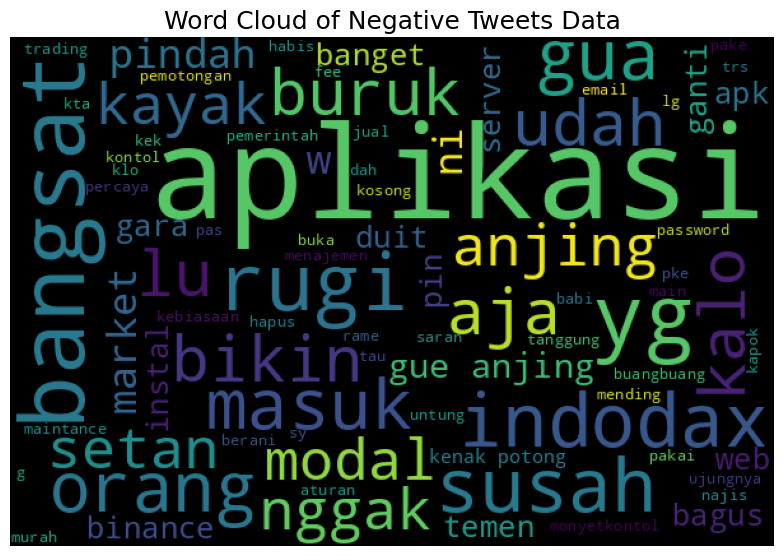

In [ ]:
# Membuat tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='black', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
# Menampilkan word cloud.
plt.show()

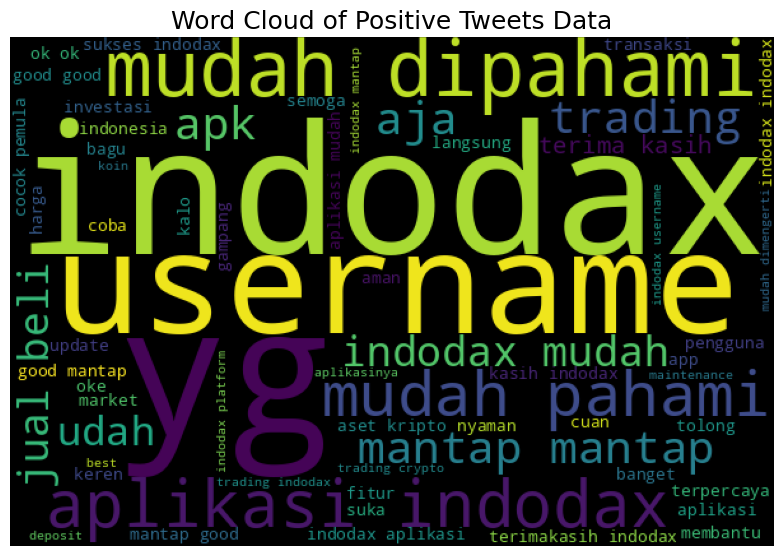

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='black', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

# Menampilkan word cloud.
plt.show()

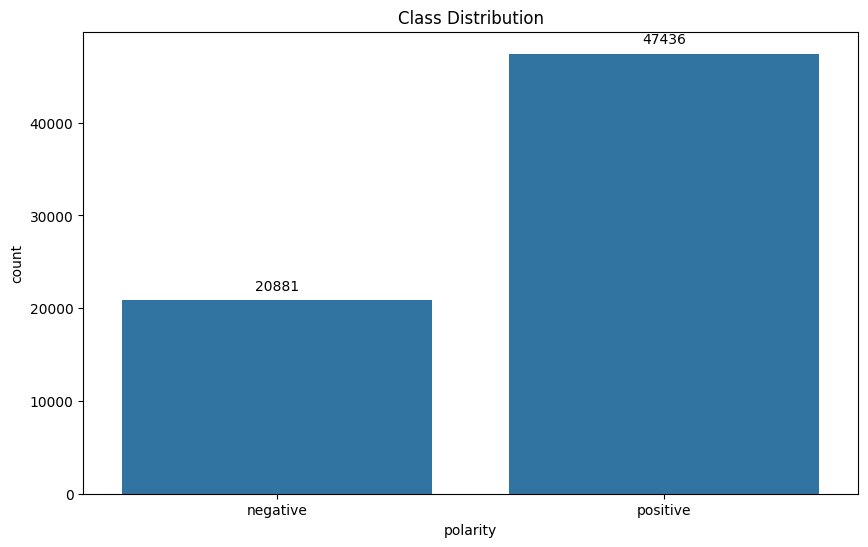

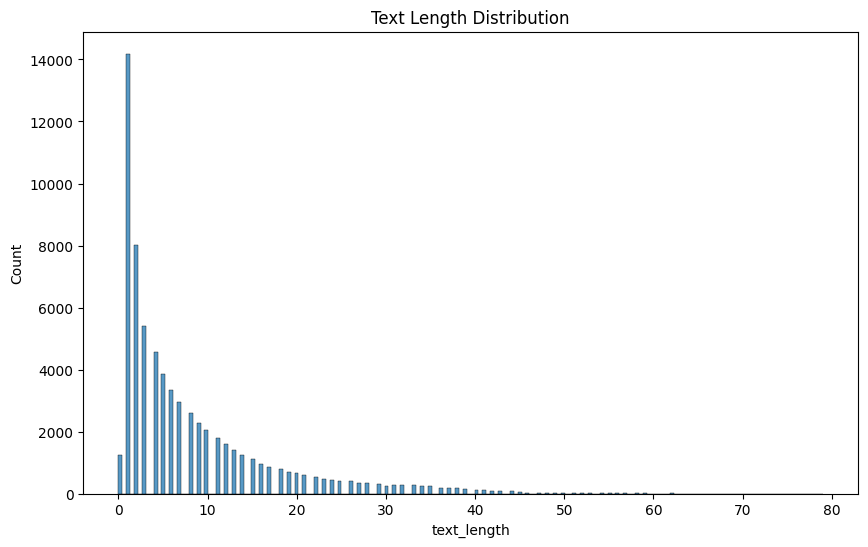

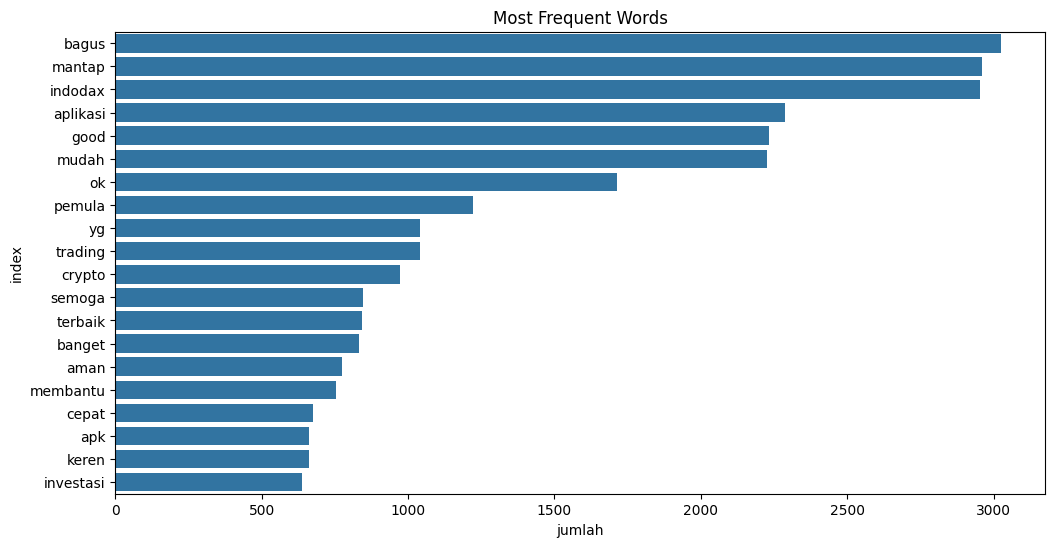

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=app_reviews_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
app_reviews_df['text_length'] = app_reviews_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(app_reviews_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(app_reviews_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## Data Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
app_reviews_df.head()

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,"kesulitan ada disaat pembuatan garis trend dan sebagainya, yaitu ketika ingin menggeser geser garis, selalu menampilkan opsi (kalau di PC, pilihan menu yg muncul ketika kita klik mouse kanan). Agak kesel juga sih, mungkin sedikit diperbaiki sensitifitasnya .. overall aplikasi sangat bagus.",kesulitan ada disaat pembuatan garis trend dan sebagainya yaitu ketika ingin menggeser geser garis selalu menampilkan opsi kalau di PC pilihan menu yg muncul ketika kita klik mouse kanan Agak kesel juga sih mungkin sedikit diperbaiki sensitifitasnya overall aplikasi sangat bagus,kesulitan ada disaat pembuatan garis trend dan sebagainya yaitu ketika ingin menggeser geser garis selalu menampilkan opsi kalau di pc pilihan menu yg muncul ketika kita klik mouse kanan agak kesel juga sih mungkin sedikit diperbaiki sensitifitasnya overall aplikasi sangat bagus,kesulitan ada disaat pembuatan garis trend dan sebagainya yaitu ketika ingin menggeser geser garis selalu menampilkan opsi kalau di pc pilihan menu yg muncul ketika kita klik mouse kanan agak kesel juga sih mungkin sedikit diperbaiki sensitifitasnya overall aplikasi sangat bagus,"[kesulitan, ada, disaat, pembuatan, garis, trend, dan, sebagainya, yaitu, ketika, ingin, menggeser, geser, garis, selalu, menampilkan, opsi, kalau, di, pc, pilihan, menu, yg, muncul, ketika, kita, klik, mouse, kanan, agak, kesel, juga, sih, mungkin, sedikit, diperbaiki, sensitifitasnya, overall, aplikasi, sangat, bagus]","[kesulitan, disaat, pembuatan, garis, trend, menggeser, geser, garis, menampilkan, opsi, pc, pilihan, menu, yg, muncul, klik, mouse, kanan, kesel, diperbaiki, sensitifitasnya, overall, aplikasi, bagus]",kesulitan disaat pembuatan garis trend menggeser geser garis menampilkan opsi pc pilihan menu yg muncul klik mouse kanan kesel diperbaiki sensitifitasnya overall aplikasi bagus,-23,negative,24
1,"Indodax 3.0 mudah digunakan dan aksesibel, Dengan antarmuka yang intuitif, proses daftar dan transaksi nya cepat, dan dukungan pelanggan yang responsif serta makin beragam aset kriptonya aplikasi ini tuh cocok banget bagi saya yang ingin memulai investasi kripto. @IkbalLiga #AsetMasaDepan",Indodax mudah digunakan dan aksesibel Dengan antarmuka yang intuitif proses daftar dan transaksi nya cepat dan dukungan pelanggan yang responsif serta makin beragam aset kriptonya aplikasi ini tuh cocok banget bagi saya yang ingin memulai investasi kripto,indodax mudah digunakan dan aksesibel dengan antarmuka yang intuitif proses daftar dan transaksi nya cepat dan dukungan pelanggan yang responsif serta makin beragam aset kriptonya aplikasi ini tuh cocok banget bagi saya yang ingin memulai investasi kripto,indodax mudah digunakan dan aksesibel dengan antarmuka yang intuitif proses daftar dan transaksi nya cepat dan dukungan pelanggan yang responsif serta makin beragam aset kriptonya aplikasi ini tuh cocok banget bagi saya yang ingin memulai investasi kripto,"[indodax, mudah, digunakan, dan, aksesibel, dengan, antarmuka, yang, intuitif, proses, daftar, dan, transaksi, nya, cepat, dan, dukungan, pelanggan, yang, responsif, serta, makin, beragam, aset, kriptonya, aplikasi, ini, tuh, cocok, banget, bagi, saya, yang, ingin, memulai, investasi, kripto]","[indodax, mudah, aksesibel, antarmuka, intuitif, proses, daftar, transaksi, cepat, dukungan, pelanggan, responsif, beragam, aset, kriptonya, aplikasi, tuh, cocok, banget, investasi, kripto]",indodax mudah aksesibel antarmuka intuitif proses daftar transaksi cepat dukungan pelanggan responsif beragam aset kriptonya aplikasi tuh cocok banget investasi kripto,12,positive,21
2,menurut saya aplikasi indodax ini sangat membantu kaum muda dan semua kalangan dapat berinvestasi dengan mudah. khusus nya kripto harga pasarnya sangat real. untuk kedepannya pertahankan kualitas grafik nya dan jikalau di-update jngan terlalu menor kali..,menurut saya ap

In [ ]:
X = app_reviews_df['text_akhir']
y = app_reviews_df['polarity']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


features_df

,aamiin,abal,academy,acc,account,ad,adain,adakan,address,admin,...,yak,yes,yg,yng,yo,yok,youtube,yt,yuk,zaman
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.128889,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.186388,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.345578,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68312,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68313,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68314,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68315,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Modeling

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9973651949572759
Random Forest - accuracy_test: 0.9059572599531616


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.950048487731689
Logistic Regression - accuracy_test: 0.9403542154566745


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9973651949572759
Decision Tree - accuracy_test: 0.8780737704918032


## Hasil Model

In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0        Random Forest       0.905957
1  Logistic Regression       0.940354
2        Decision Tree       0.878074


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)
print(accuracy_test_sorted)

                 Model  Accuracy Test
1  Logistic Regression       0.940354
0        Random Forest       0.905957
2        Decision Tree       0.878074


Dalam kasus Sentiment Analysis ini, algoritma Logistic Regresion mencapai akurasi tertinggi sebesar 88,54%. Oleh karena itu, algoritma Logistic Regresion dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

## Simpan Model

In [ ]:
import joblib

#simpan model terbaik kedalam file dengan ekstensi .h5
joblib.dump(logistic_regression,'/content/drive/MyDrive/hist_model/ml_best_logisticRegression_model.h5')

['/content/drive/MyDrive/hist_model/ml_best_logisticRegression_model.h5']

# Inference Model

In [ ]:
# input teks baru
new_teks = input("masukan komentar: ")
# transformasi teks menggunakan vectorizer yang sudah dilatih
new_teks_tfidf = tfidf.transform([new_teks])

#lakukan prediksi
predicted_label = logistic_regression.predict(new_teks_tfidf)

# tampikan hasil prediksi
print (f"teks : {new_teks[0]}")
if predicted_label[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

masukan komentar: Pelayanan sangat memuaskan dan cepat sekali
teks : P
Sentimen kalimat baru adalah POSITIF.


# Requitment Text

In [ ]:
!pip freeze requirements.text

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.28.0.37.27
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
commun